<h1><center>Lab 1 - A1</center></h1>

##	REQUIREMENTS
1.	Source code (notebook) needs to be documented.
2.	Algorithms have to be tested for several parameter values (sufficient to clearly determine performance).
3.	Experiments must be performed for all available problem instances and results compared for diferent parameter settings.
4.	Results of the experiments need to be saved in output files, indicating solution quality, parameter values used, number of runs.
5.	A report should capture the following: problem definition, algorithm used (name, steps/pseudocode), parameter setting, comparative results of experiments, discussion of results.


## Knapsack Problem
- $n$ objects, each has a value ($v$) and a weight ($w$)
- Objective: the knapsack to contain max value without exceeding max weight $W$
 - $x_i=1$ means object $i$ is selected
 - $x_i=0$ means object $j$ is not selected

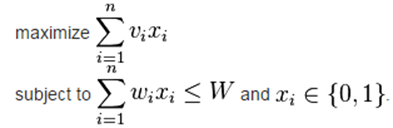


## WORK DURING THE LAB
1.	Exhaustive search: generate all possible binary strings of size N and print them on the screen. Test the code for different values of N.
2.	Read data for the knapsack problem.
3.	Generate a random solution for the knapsack problem and verify its quality.

**Points for the work during the lab: 25p**


In [22]:
import sys
import contextlib # used for redirecting prints to output files
import time
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Utility functions
def redirect_output_to_file(filename, func, *args, **kwargs):
  '''
    Executes a print function and redirects its output to a given filename
    Input:
      - filename: string
      - func: void function
      - *args: arbitraty number of non-keyword arguments
      - **kwargs: arbitraty number of keyword arguments
    Output: None
      (The print outputs of the function call will be stored in the file)
  '''
  with open(filename, "w") as f:
    # redirect standard output to file
    with contextlib.redirect_stdout(f):
      # call void function
      func(*args, **kwargs)

### 1. Exhaustive search

#### Implementation

In [6]:
# Exhaustive search algorithm

def generate_binary_string(n, current_arr, result):
  '''
    Helper function: generates all possible binary lists of size n recursively
    Input:
      - n: int
      - current_arr: list[{0,1}]
        (binary list of intermediate size)
      - result: list[list[{0,1}]]
        (list of binary lists of size n)
    Output: None
      (value of result is modified to contain the generated lists)
  '''
  if len(current_arr) == n:
    result.append(current_arr[:])
    return
  # append 1 to current list
  current_arr.append(1)
  generate_binary_string(n, current_arr, result)
  current_arr.pop()
  # append 0 to current list
  current_arr.append(0)
  generate_binary_string(n, current_arr, result)
  current_arr.pop()

def exhaustive_search(n):
  '''
  Generates all possible binary lists of size n
  Input:
    - n: int
  Output:
    - arr: list[list[{0,1}]]
    (list of binary lists of size n)
  '''
  arr = []
  generate_binary_string(n, [], arr)
  return arr

def print_exhaustive_search(n):
  '''
  Prints all possible binary lists of size n
  Input:
    - n: int
  Output: None
    (the lists are printed on the screen on separate lines)
  '''
  lists = exhaustive_search(n)
  print(f"Binary strings of size {n}:")
  for list in lists:
    print(list)

#### Testing

In [9]:
# Test function for different values of n

# n = 2
print_exhaustive_search(2)
# n = 4
print_exhaustive_search(4)

# n = 10
# print to file and show execution time
start_time = time.time()
redirect_output_to_file("output_files/exhaustive_search_10.txt", print_exhaustive_search, 10)
end_time = time.time()
print(f"Execution time for n = 10 : {(end_time - start_time):.6f} seconds")

# n = 20
# print to file and show execution time
start_time = time.time()
redirect_output_to_file("output_files/exhaustive_search_20.txt", print_exhaustive_search, 20)
end_time = time.time()
print(f"Execution time for n = 20 : {(end_time - start_time):.6f} seconds")

# n = 25
# print to file and show execution time
start_time = time.time()
redirect_output_to_file("output_files/exhaustive_search_25.txt", print_exhaustive_search, 25)
end_time = time.time()
print(f"Execution time for n = 25 : {(end_time - start_time):.6f} seconds")

Binary strings of size 2:
[1, 1]
[1, 0]
[0, 1]
[0, 0]
Binary strings of size 4:
[1, 1, 1, 1]
[1, 1, 1, 0]
[1, 1, 0, 1]
[1, 1, 0, 0]
[1, 0, 1, 1]
[1, 0, 1, 0]
[1, 0, 0, 1]
[1, 0, 0, 0]
[0, 1, 1, 1]
[0, 1, 1, 0]
[0, 1, 0, 1]
[0, 1, 0, 0]
[0, 0, 1, 1]
[0, 0, 1, 0]
[0, 0, 0, 1]
[0, 0, 0, 0]
Execution time for n = 10 : 0.013770 seconds
Execution time for n = 20 : 4.681582 seconds
Execution time for n = 25 : 250.526976 seconds


### 2. Loading data

In [15]:
# Load data from file
def load_data(file_name):
  '''
    Loads data for the knapsack problem from a file
    Input:
      - file_name: str
    Output:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
  '''
  weights_and_values = []
  with open(file_name) as f:
    # first number = number of records
    size = (int)(f.readline().strip())
    # read index, value, weight for all records
    for i in range(size):
      info = f.readline().strip().split()
      index, value, weight = (int)(info[0]), (int)(info[1]), (int)(info[2])
      weights_and_values.append((weight, value))
    # last number = maximum weight
    max_weight = (int)(f.readline().strip())
  return size, weights_and_values, max_weight

# read from "knapsack-20.txt"
print("Load data 20 entries:")
load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

# read from "rucsac-200.txt"
# print("Load data 200 entries:")
# load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

Load data 20 entries:


(20,
 [(29, 91),
  (65, 60),
  (71, 61),
  (60, 9),
  (45, 79),
  (71, 46),
  (22, 19),
  (97, 57),
  (6, 8),
  (91, 84),
  (57, 20),
  (60, 72),
  (49, 32),
  (89, 31),
  (2, 28),
  (30, 81),
  (90, 55),
  (25, 43),
  (82, 100),
  (19, 27)],
 524)

### 3. Random solution

#### Implementation

In [13]:
# Generate a random solution for the knapsack problem

def generate_random_configuration(n):
  '''
    Generate a random binary list of size n
    Input:
      - n: int
    Output:
      - list[{0,1}] -> size = n
  '''
  return np.random.randint(2, size=n).tolist()

def knapsack_weight(n, weights_and_values, configuration):
  '''
    Returns the total weight of the knapsack for a certain configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - weight: int
  '''
  weight = 0
  for i in range(n):
    if configuration[i] == 1:
      curr_weight, curr_value = weights_and_values[i]
      weight += curr_weight
  return weight

def knapsack_value(n, weights_and_values, configuration):
  '''
    Returns the total value of the knapsack for a certain configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - value: int
  '''
  value = 0
  for i in range(n):
    if configuration[i] == 1:
      curr_weight, curr_value = weights_and_values[i]
      value += curr_value
  return value

def knapsack_is_valid(n, weights_and_values, configuration, max_weight):
  '''
    Checks if a certain knapsack configuration is a valid solution
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
      - max_weight: int
    Output:
      - bool
  '''
  weight = knapsack_weight(n, weights_and_values, configuration)
  return weight <= max_weight

def knapsack_fitness(n, weights_and_values, configuration, max_weight):
  '''
    Returns the total value of the knapsack for a certain configuration if it is valid
      or -1 if it is not valid
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - fitness: int
  '''
  if not knapsack_is_valid(n, weights_and_values, configuration, max_weight):
    return -1
  return knapsack_value(n, weights_and_values, configuration)

def generate_random_knapsack(n, weights_and_values, max_weight):
  '''
    Generates a random knapsack configuration and computes its weight, value and fitness
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: int
  '''
  configuration = generate_random_configuration(n)
  weight = knapsack_weight(n, weights_and_values, configuration)
  value = knapsack_value(n, weights_and_values, configuration)
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  return configuration, weight, value, fitness

def generate_random_valid_knapsack(n, weights_and_values, max_weight):
  '''
    Generates random knapsack configurations until it finds a valid one
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: int
  '''
  while True:
    configuration, weight, value, fitness = generate_random_knapsack(n, weights_and_values, max_weight)
    if fitness > 0:
      break
  return configuration, weight, value, fitness

def print_knapsack_solution(n, max_weight, configuration, weight, value, fitness):
  '''
    Prints a solution of a given knapsack problem
    Input:
      - n: int
      - max_weight: int
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: double
  '''
  print(f"Solution for knapsack problem of size {n} with max weight {max_weight}:")
  print(f"Configuration: {configuration}")
  print(f"Weight: {weight}; Value: {value}")
  print(f"Fitness: {fitness}")


#### Testing:

In [16]:
# Test random solution for different values of n

# n = 20
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

configuration, weight, value, fitness = generate_random_valid_knapsack(n, weights_and_values, max_weight)
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

print()

# n = 200
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

configuration, weight, value, fitness = generate_random_valid_knapsack(n, weights_and_values, max_weight)
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

Solution for knapsack problem of size 20 with max weight 524:
Configuration: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]
Weight: 286; Value: 260
Fitness: 260

Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
Weight: 111585; Value: 130485
Fitness: 130485


## ASSIGNMENT A1
1.	Implement a random search method for the knapsack problem.
  -	From k random solutions, the method should return the best one.
  -	Test the method for different values of k.
  -	Perform experiments for knapsack instances of size 20 and 200.
2.	Submit source code and report.

**Deadline to submit A1: Lab 2**  
**Points for A1: 25p**

### Random search method

#### Implementation

In [25]:
# Implement a random search algorithm for the knapsack problem

def knapsack_random_search(k, n, weights_and_values, max_weight):
  '''
    Generates k random solutions to the knapsack problem and returns the best one
    Input:
      - k: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: double
  '''
  best_fitness = 0
  best_knapsack = None
  for step in range(k):
    configuration, weight, value, fitness = generate_random_valid_knapsack(n, weights_and_values, max_weight)
    if fitness > best_fitness:
      best_fitness = fitness
      best_knapsack = (configuration, weight, value, fitness)
  return best_knapsack

def knapsack_random_search_m_times(m, k, n, weights_and_values, max_weight):
  '''
    Runs the random search algorithm for the knapsack problem m times and returns the best solutions round
    Input:
      - m: int
      - k: int
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - best_solutions: list[knapsack]
        knapsack: tuple
          - configuration: list[{0,1}] -> size = n
          - weight: int
          - value: int
          - fitness: double
  '''
  best_solutions = []
  for step in range(m):
    best_knapsack = knapsack_random_search(k, n, weights_and_values, max_weight)
    best_solutions.append(best_knapsack)
  return best_solutions

#### Testing for size = 20

In [19]:
# Test random search method for n = 20 and different values of k

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

# k = 10
configuration, weight, value, fitness = knapsack_random_search(10, n, weights_and_values, max_weight)
print("Result with k = 10")
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

print()

# k = 100
configuration, weight, value, fitness = knapsack_random_search(100, n, weights_and_values, max_weight)
print("Result with k = 100")
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

print()

# k = 1000
configuration, weight, value, fitness = knapsack_random_search(1000, n, weights_and_values, max_weight)
print("Result with k = 1000")
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

Result with k = 10
Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
Weight: 450; Value: 549
Fitness: 549

Result with k = 100
Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Weight: 485; Value: 589
Fitness: 589

Result with k = 1000
Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Weight: 474; Value: 637
Fitness: 637


#### Testing for size = 200

In [21]:
# Test random search method for n = 200 and different values of k

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

# k = 100
configuration, weight, value, fitness = knapsack_random_search(100, n, weights_and_values, max_weight)
print("Result with k = 100")
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

print()

# k = 1000
configuration, weight, value, fitness = knapsack_random_search(1000, n, weights_and_values, max_weight)
print("Result with k = 1000")
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

print()

# k = 10000
configuration, weight, value, fitness = knapsack_random_search(10000, n, weights_and_values, max_weight)
print("Result with k = 10000")
print_knapsack_solution(n, max_weight, configuration, weight, value, fitness)

Result with k = 100
Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]
Weight: 112258; Value: 131858
Fitness: 131858

Result with k = 1000
Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1

### Report
Let us analyse systematically
- how the best solutions found for the same parameters n and k differ with multiple iterations of the random search algorithm
- how the different input sizes of parameter k influence algorithm performance for the same parameter n  

In doing so, let us also take into consideration the computational resources used in terms of execution time.

In [43]:
# Helper functon to display data in table format

def display_random_search_solutions_markdown_table(n_values, k_values, best_fitnesses, execution_times):
  '''
    Displays random search solutions data in markdown table format
    Input:
      - n_values: list[int] -> size = n
      - k_values: list[int] -> size = n
      - best_fitnesses: list[int] -> size = n
      - execution_times: list[double] -> size = n
    Output:
      - markdown_table: string
  '''
  markdown_table = "| n | k | Best Fitness | Execution time (seconds) |\n"
  markdown_table += "|---|---|---|---| \n"
  for i in range(len(n_values)):
    markdown_table += f"| {n_values[i]} | {k_values[i]} | {best_fitnesses[i]} | {execution_times[i]} |\n"
  return markdown_table

#### Part 1: small dataset analysis

In [23]:
# Load data for small dataset
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

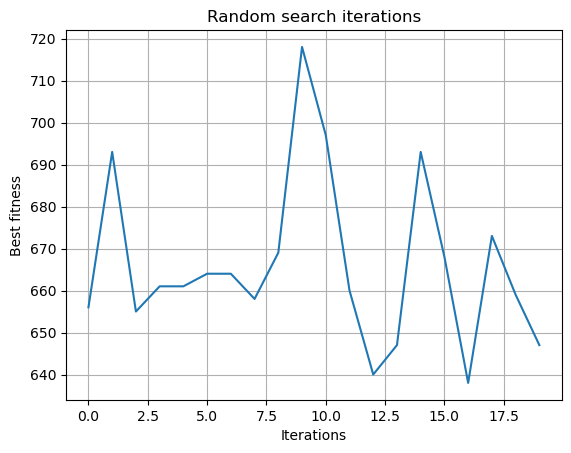

In [28]:
# Peformance of random search algorithm over multiple iterations for the same values of n and k

k = 1000 # number of solutions considered
m = 20  # number of iterations of random search algorithm

# calculate best knapsacks for the iterations considered
best_knapsacks = knapsack_random_search_m_times(m, k, n, weights_and_values, max_weight)
best_fitnesses = [knapsack[3] for knapsack in best_knapsacks]

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("Random search iterations")
plt.show()

In [44]:
# Performance analysis for the random search algorithm with n = 20 and some different values of k

# some values of k considered
k_values = [50, 100, 500, 1000, 10000, 100000, 500000]
n_values = [n for _ in range(len(k_values))]

best_fitnesses = []
execution_times = []

# calculate best knapsack fitnesses and execution times for values of k
for k in k_values:
  start_time = time.time()
  best_knapsack = knapsack_random_search(k, n, weights_and_values, max_weight)
  end_time = time.time()
  best_fitnesses.append(best_knapsack[3])
  execution_times.append(end_time - start_time)

# show data in markdown table
markdown_table = display_random_search_solutions_markdown_table(n_values, k_values, best_fitnesses, execution_times)

print(markdown_table) # formatted data in cell below

| n | k | Best Fitness | Execution time (seconds) |
|---|---|---|---| 
| 20 | 50 | 618 | 0.0029909610748291016 |
| 20 | 100 | 611 | 0.0035247802734375 |
| 20 | 500 | 666 | 0.01560211181640625 |
| 20 | 1000 | 649 | 0.03187274932861328 |
| 20 | 10000 | 688 | 0.2537264823913574 |
| 20 | 100000 | 707 | 2.3517849445343018 |
| 20 | 500000 | 718 | 11.438002824783325 |



| n | k | Best Fitness | Execution time (seconds) |
|---|---|---|---| 
| 20 | 50 | 618 | 0.0029909610748291016 |
| 20 | 100 | 611 | 0.0035247802734375 |
| 20 | 500 | 666 | 0.01560211181640625 |
| 20 | 1000 | 649 | 0.03187274932861328 |
| 20 | 10000 | 688 | 0.2537264823913574 |
| 20 | 100000 | 707 | 2.3517849445343018 |
| 20 | 500000 | 718 | 11.438002824783325 |

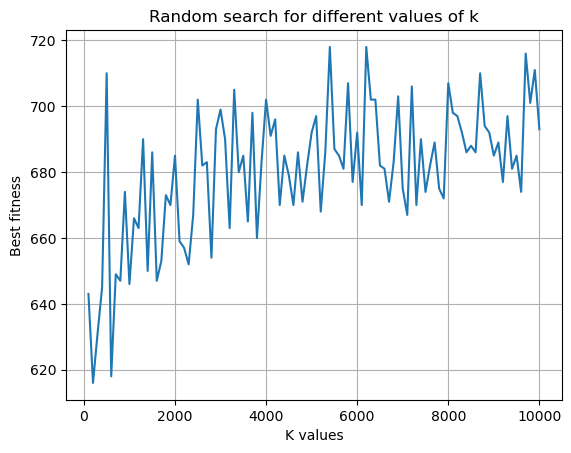

In [37]:
# Evolution of fitness over time for the random search algorithm with n = 20 and different values of k

# vector of k values starting from 100 and going to 10000 with step 100
k_values = [int(k) for k in np.linspace(100, 10000, 100)]

# best knapsacks for given n and the k values defined above
best_knapsacks = [knapsack_random_search(k, n, weights_and_values, max_weight) for k in k_values]
best_fitnesses = [knapsack[3] for knapsack in best_knapsacks]

# plot data
plt.plot(k_values, best_fitnesses)
plt.grid()
plt.xlabel("K values")
plt.ylabel("Best fitness")
plt.title("Random search for different values of k")
plt.show()

#### Part 2: large dataset analysis

In [45]:
# Load data for large dataset
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

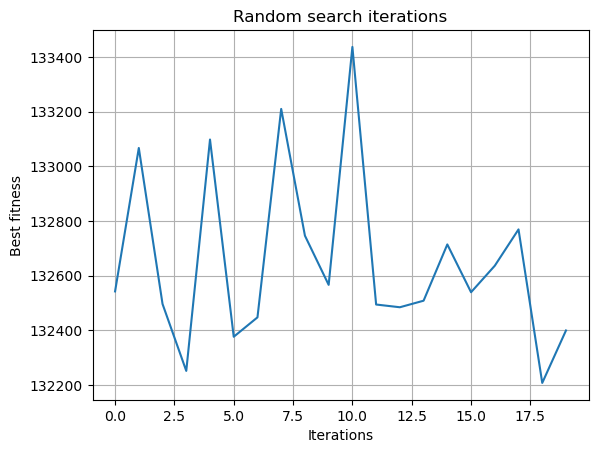

In [47]:
# Peformance of random search algorithm over multiple iterations for the same values of n and k

k = 1000 # number of solutions considered
m = 20  # number of iterations of random search algorithm

# calculate best knapsacks for the iterations considered
best_knapsacks = knapsack_random_search_m_times(m, k, n, weights_and_values, max_weight)
best_fitnesses = [knapsack[3] for knapsack in best_knapsacks]

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("Random search iterations")
plt.show()

In [48]:
# Performance analysis for the random search algorithm with n = 200 and some different values of k

# some values of k considered
k_values = [50, 100, 500, 1000, 10000, 100000, 500000]
n_values = [n for _ in range(len(k_values))]

best_fitnesses = []
execution_times = []

# calculate best knapsack fitnesses and execution times for values of k
for k in k_values:
  start_time = time.time()
  best_knapsack = knapsack_random_search(k, n, weights_and_values, max_weight)
  end_time = time.time()
  best_fitnesses.append(best_knapsack[3])
  execution_times.append(end_time - start_time)

# show data in markdown table
markdown_table = display_random_search_solutions_markdown_table(n_values, k_values, best_fitnesses, execution_times)

print(markdown_table) # formatted data in cell below

| n | k | Best Fitness | Execution time (seconds) |
|---|---|---|---| 
| 200 | 50 | 132333 | 0.007538318634033203 |
| 200 | 100 | 131090 | 0.010548114776611328 |
| 200 | 500 | 132154 | 0.051111459732055664 |
| 200 | 1000 | 133114 | 0.09586977958679199 |
| 200 | 10000 | 132907 | 1.120723009109497 |
| 200 | 100000 | 133540 | 10.08656096458435 |
| 200 | 500000 | 133535 | 51.96841549873352 |



| n | k | Best Fitness | Execution time (seconds) |
|---|---|---|---| 
| 200 | 50 | 132333 | 0.007538318634033203 |
| 200 | 100 | 131090 | 0.010548114776611328 |
| 200 | 500 | 132154 | 0.051111459732055664 |
| 200 | 1000 | 133114 | 0.09586977958679199 |
| 200 | 10000 | 132907 | 1.120723009109497 |
| 200 | 100000 | 133540 | 10.08656096458435 |
| 200 | 500000 | 133535 | 51.96841549873352 |

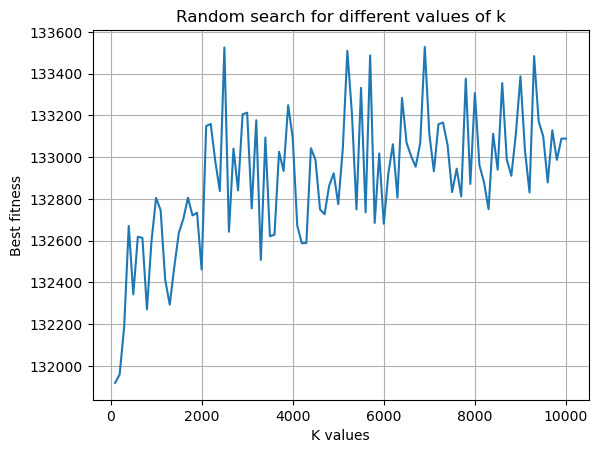

In [49]:
# Evolution of fitness over time for the random search algorithm with n = 200 and different values of k

# vector of k values starting from 100 and going to 10000 with step 100
k_values = [int(k) for k in np.linspace(100, 10000, 100)]

# best knapsacks for given n and the k values defined above
best_knapsacks = [knapsack_random_search(k, n, weights_and_values, max_weight) for k in k_values]
best_fitnesses = [knapsack[3] for knapsack in best_knapsacks]

# plot data
plt.plot(k_values, best_fitnesses)
plt.grid()
plt.xlabel("K values")
plt.ylabel("Best fitness")
plt.title("Random search for different values of k")
plt.show()

#### Interpreting the results
Some key takeaways from the experiments performed are the following:
- The first experiment shows that random search is an algorithm with **high variability** and is **subject to inconsistencies**, for both large and small datasets. The same values for n and k produced highly different results over multiple iterations.
  
- The second experiment shows that the algorithm generally produces **better results for higher values of k**. However, there are **relatively small improvements** from one value of k to the other, which come at the cost of **an exponential increase in computing power** necessary.
  
- The third experiment confirms the first two takeaways and shows that higher values of k seem to be positively correlated to better results, while at the same time having high variability.